<div style="background-color:#96CDF2; padding:10px;color:#3B3C3E">
Licence <a rel="license" href="http://creativecommons.org/licenses/by-sa/4.0/">CC BY-SA</a>
<a rel="license" href="http://creativecommons.org/licenses/by-sa/4.0/"><img alt="Licence Creative Commons" style="border-width:0; float:right;" src="https://i.creativecommons.org/l/by-sa/4.0/88x31.png" /></a><br />
Germain Salvato Vallverdu - <tt>germain.vallverdu@univ-pau.fr</tt> <br />
<i><a href="http://iprem.univ-pau.fr/fr/index.html">IPREM</a> / <a href="http://www.univ-pau.fr/">Univ Pau &amp; Pays Adour</a></i>
</div>

# Un graphique en coordonnées polaires

Ce Notebook présente la construction d'un graphique en coordonnées polaires avec matplotlib.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

## 1. Coordonnées polaires, un rappel

--- 

Le système de coordonnées polaires, est un système de coordonnées à deux dimensions dans lequel la position d'un point est déterminée par rapport à un angle, $\theta$, et une distance, $r$.

Vocabulaires ou définitions :

* Pôle : point central, correspond à l'origine des coordonnées cartésiennes
* coordonnée radiale : notée $r$ ou $\rho$ et appelée rayon, est la distance entre le point et le pôle
* coordonnée angulare ou angle polaire ou azimut : notée $\theta$ ou $t$, c'est l'angle orienté, dans le sens trigonométrique, anti-horaire, entre la demi-droite passant par le point et le pôle et la demi-droite d'angle $\theta=0^o$, appelée axe polaire (équivalent de l'axe des abscisses en coordonnées cartésiennes.

Pour rappel, on passe des coordonnées cartésiennes aux coordonnées polaires par :

\begin{cases}
    x = r \cos\theta \\
    y = r \sin\theta
\end{cases}

<div class="alert alert-success">
<b>Exercice :</b> placer les points suivants en utilisant les coordonnées polaires :

$\left(0; 1 \right)$
$\left(\frac{5\pi}{6}; \frac{1}{2} \right)$
$\left(\frac{\pi}{4}; \frac{3}{4} \right)$
$\left(\frac{3\pi}{2}; \frac{1}{5} \right)$
$\left(\frac{7\pi}{5}; \frac{3}{4} \right)$
</div>

![polar coordinates](./polar_coordinates.png)

## 2. Coordonnées polaires avec matplotlib

---

Matplotlib dispose des outils nécessaires pour faire un graphique en coordonnées polaires. La façon la plus simple est d'utiliser la fonction `plt.polar()` du module `matplotlib.pyplot`. Les valeurs de $\theta$ doivent être données en radian. Il existe dans le module `numpy` des fonctions qui font la conversion entre radians et degrés ainsi que la constante $\pi$ :

In [2]:
print("pi = ", np.pi)
print("60 degres = ", np.radians(60), " radians")
print("pi / 3 radians = ", np.degrees(np.pi / 3), " degres")

pi =  3.141592653589793
60 degres =  1.0471975512  radians
pi / 3 radians =  60.0  degres


### 2.1 Des points

Par exemple, voici un point en $\left(\frac{\pi}{3}, 1\right)$ :

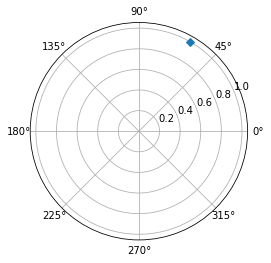

In [3]:
plt.polar(np.pi / 3, 1, marker="D")

<div class="alert alert-success">
<b>Exercice :</b> Reprendre l'exercice précédent et placer les points suivants avec matplotlib :

$\left(0; 1 \right)$
$\left(\frac{5\pi}{6}; \frac{1}{2} \right)$
$\left(\frac{\pi}{4}; \frac{3}{4} \right)$
$\left(\frac{3\pi}{2}; \frac{1}{5} \right)$
$\left(\frac{7\pi}{5}; \frac{3}{4} \right)$
</div>

(<a list of 5 Line2D rgridline objects>, <a list of 5 Text rgridlabel objects>)

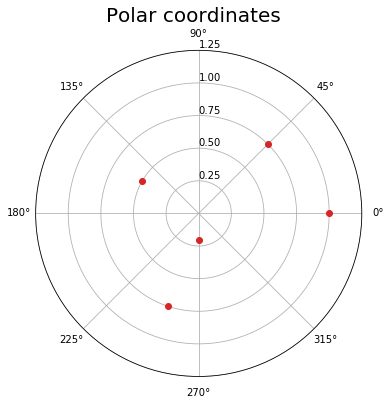

In [4]:
points = [(0, 1), 
          (5 * np.pi / 6, .5), 
          (np.pi / 4, .75), 
          (3 * np.pi / 2, .2), 
          (7 * np.pi / 5, .75),]

theta = [t for t, r in points]
radius = [r for t, r in points]

plt.figure(figsize=(6, 6))
plt.suptitle("Polar coordinates", fontsize=20)
plt.polar(theta, radius, marker="o", color="C3", linewidth=0)
plt.rgrids([0.25, 0.5, 0.75, 1., 1.25], angle=90)

### 2.2 Une fonction polaire

De la même manière que pour un graphique en coordonnées cartésiennes, il est possible de tracer une fonction. Néanmoins, les valeurs de $r(\theta)$ doivent être strictement positives.

Par exemple voici la fonction 

$$r(\theta) = \left\vert 3 \cos^2\theta - 1 \right\vert$$

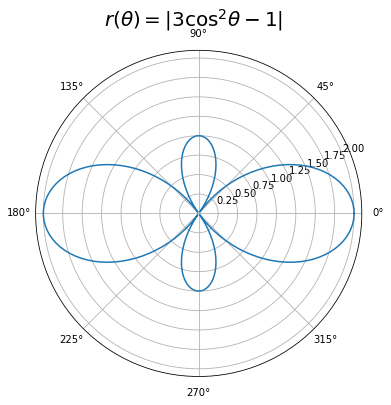

In [5]:
plt.figure(figsize=(6, 6))
theta = np.linspace(0, 2 * np.pi, 200)
r = np.abs(3 * np.cos(theta)**2 - 1)
plt.polar(theta, r)
plt.suptitle(r"$r(\theta) = \left\vert 3 \cos^2\theta - 1 \right\vert$", fontsize=20)

### 2.3 La version orientée objet

Pour tracer un graphique en coordonnées polaires, il est préférable d'utiliser la syntaxe orientée objet de matplotlib. Cette syntaxe offre des options de configuration avancées pour contrôler les axes et la grille d'un graphique en coordonnées polaires.

Voici comment s'écrit l'exemple ci-dessus, en utilisant cette syntaxe. Deux éléments à bien noter :

* On utilise ici `ax.plot` et non `ax.polar`.
* Pour les fonctions permettant de contrôler la grille, les valeurs de $\theta$ sont en degrés.

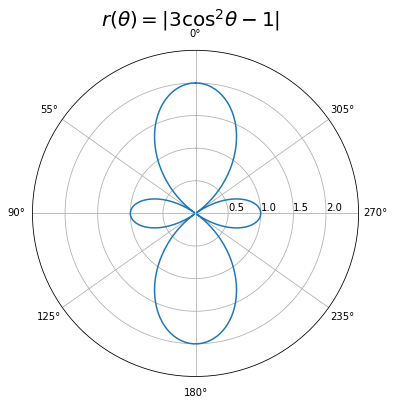

In [6]:
fig = plt.figure(figsize=(6, 6))
fig.suptitle(r"$r(\theta) = \left\vert 3 \cos^2\theta - 1 \right\vert$", fontsize=20)

theta = np.linspace(0, 2 * np.pi, 200)
r = 3 * np.cos(theta)**2 - 1

ax = fig.add_subplot(111, projection="polar")
ax.plot(theta, np.abs(r))

# controles de la grilles:
ax.set_rlim((0, 2.5))
ax.set_rgrids([.5, 1, 1.5, 2.], angle=270)
ax.set_thetagrids([0, 54.74, 90, 180 - 54.74, 180, 180 + 54.74, 270, 360 - 54.74])
ax.set_theta_zero_location("N")

## 3. Quelques courbes

---

Les courbes usuelles les plus simples en coordonnées polaires sont la rosace et la spirale d'Archimède.

La rosace a pour équation :

$$r(\theta) = a \cos\left(k\theta + \phi_o\right)$$

où $k$ est un entier qui détermine le nombre de pétales, $a$ la taille et $\phi_o$ fait tourner l'ensemble.

La spirale d'Archimède a pour équation :

$$r(\theta) = a + b\theta$$

où $a$ détermine le point de départ sur la droite $\theta=0$ et $b$ l'écart entre deux bras successifs.

<div class="alert alert-success">
<b>Exercice :</b> Tracer une rosace.
</div>

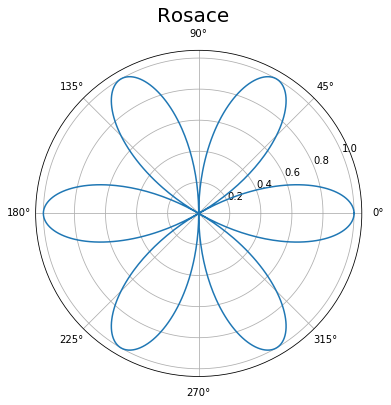

In [7]:
def rosace(theta, a=1, k=3, phi=0):
    """ Return a rosace with an amplitude a and k branches """
    return a * np.cos(k * theta + phi)

fig = plt.figure(figsize=(6, 6))
fig.suptitle("Rosace", fontsize=20)

# compute theta and r
theta = np.linspace(0, 2 * np.pi, 1000)
r = rosace(theta, k=3)

# plot the rosace
ax = fig.add_subplot(111, projection="polar")
ax.plot(theta, np.abs(r))

<div class="alert alert-success">
<b>Complément :</b> La rosace devrait avoir k branches si k est impair et 2k branches si k est pair. 
Pour le vérifier, il faut utiliser la convention suivante : si $r < 0$ alors $\theta = \theta + \pi$. Consulter la documentation de la fonction `np.where()` pour voir comment appliquer efficacement cette condition.
</div>

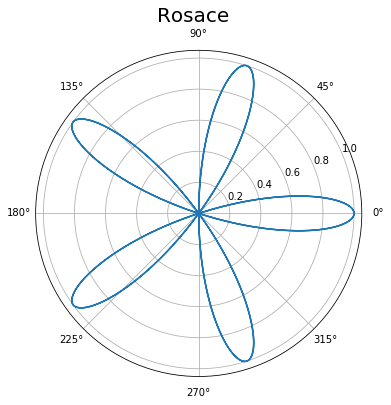

In [8]:
fig = plt.figure(figsize=(6, 6))
fig.suptitle("Rosace", fontsize=20)

# compute theta and r
theta = np.linspace(0, 2 * np.pi, 1000)
r = rosace(theta, k=5)

# theta = theta + pi if r < 0
theta2 = np.where(r > 0, theta, theta + np.pi)

ax = fig.add_subplot(111, projection="polar")
ax.plot(theta2, np.abs(r))

<div class="alert alert-success">
<b>Exercice :</b> Tracer une spirale d'archimede et changer les valeurs de a et b pour voir l'effet sur la courbe.
</div>

(0, 1)

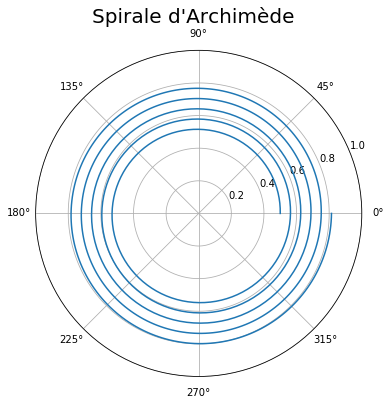

In [9]:
def spirale(theta, a, b):
    """ compute a spirale of amplitude b which start at (0°, a) """
    return a + b * theta

fig = plt.figure(figsize=(6, 6))
fig.suptitle("Spirale d'Archimède", fontsize=20)

# compute theta and r
theta = np.linspace(0, 10 * np.pi, 1000)
r = spirale(theta, 0.5, 0.01)

# plot
ax = fig.add_subplot(111, projection="polar")
ax.plot(theta, r)
ax.set_rlim((0, 1))

<div class="alert alert-success">
**Exercice : ** Tracer le papillon de T. Fay pour $\theta\in[0; 18\pi]$ dont l'équation est la suivante :

$$r(\theta) = e^{\cos\theta} - 2\cos4\theta + \sin^5\frac{\theta}{12}$$
</div>

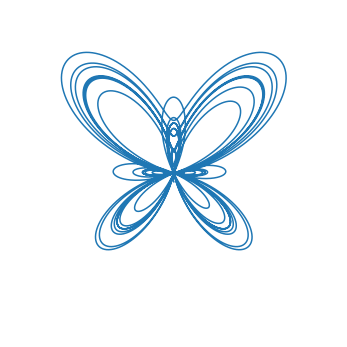

In [10]:
def papillon(theta):
    return np.exp(np.cos(theta)) - 2 * np.cos(4 * theta) + (np.sin(theta / 12))**5

fig = plt.figure(figsize=(6, 6))
ax = fig.add_subplot(111, projection="polar")

# theta values
theta = np.linspace(0, 18 * np.pi, 10000)
r = papillon(theta)
theta = np.where(r > 0, theta, theta + np.pi)

# plot
ax.plot(theta, np.abs(r))

# remove grids and ticks for r and theta
ax.set_thetagrids([])
ax.set_rticks([])
ax.set_frame_on(False)
# set the origin of theta
ax.set_theta_zero_location("N")

<div class="alert alert-success">
**Exercice : ** Tracer des trèfles de Habenicht, dont le nombre de pétales est déterminé par $n$ dans l'équation suivante :

$$r(\theta) = 1 + \cos n \theta + \sin^2 n \theta$$

Exercez vous aux points suivants :
<ul>
<li>Écrire une fonction qui retourne $r(\theta)$ et qui permet de choisir la valeur de $n$</li>
<li>Faire plusieurs `subplots` pour différentes valeurs de $n$.</li>
<li>Vous pouvez faire une boucle !</li>
</ul>
</div>

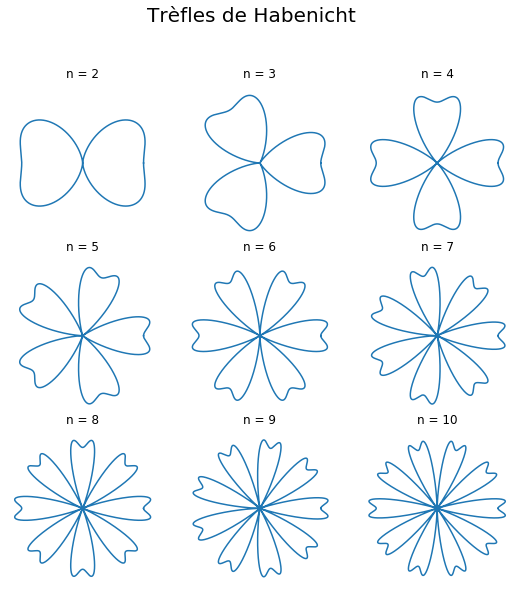

In [12]:
def trefle(theta, n=3):
    return 1 + np.cos(n * theta) + np.sin(n * theta)**2

# compute theta values
theta = np.linspace(0, 2 * np.pi, 2000)

# number of lines/columns
grid = 3

fig = plt.figure(figsize=(3 * grid, 3 * grid))
fig.suptitle("Trèfles de Habenicht", fontsize=20, y=1.01)

for i in range(grid**2):
    n = i + 2
    ax = fig.add_subplot(grid, grid, i + 1, projection="polar")
    ax.plot(theta, np.abs(trefle(theta, n)))
    ax.set_thetagrids([])
    ax.set_rticks([])
    ax.set_frame_on(False)
    ax.set_title(f"n = {n}", fontsize=12)

## Exercice sur les points

---

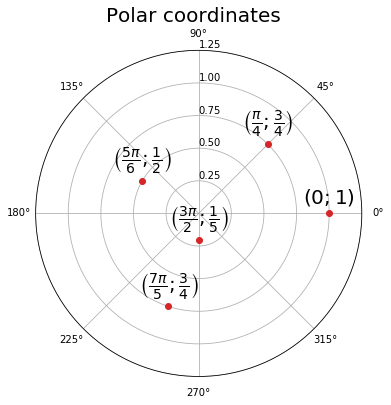

In [12]:
points = [(r"$\left(0; 1 \right)$", 0, 1), 
          (r"$\left(\frac{5\pi}{6}; \frac{1}{2} \right)$", 5 * np.pi / 6, .5), 
          (r"$\left(\frac{\pi}{4}; \frac{3}{4} \right)$", np.pi / 4, .75), 
          (r"$\left(\frac{3\pi}{2}; \frac{1}{5} \right)$", 3 * np.pi / 2, .2), 
          (r"$\left(\frac{7\pi}{5}; \frac{3}{4} \right)$", 7 * np.pi / 5, .75),]

theta = [t for name, t, r in points]
radius = [r for name, t, r in points]

plt.figure(figsize=(6, 6))
plt.suptitle("Polar coordinates", fontsize=20)
plt.polar(theta, radius, marker="o", color="C3", linewidth=0)
plt.rgrids([0.25, 0.5, 0.75, 1., 1.25], angle=90)

for name, t, r in points:
    plt.annotate(name,
                 xy=(t, r),  # theta, radius
                 textcoords="offset points",
                 xytext=(0, 5),
                 fontsize=20,
                 horizontalalignment='center',
                 verticalalignment='bottom')

plt.savefig("polar_coordinates.png")